# Exercise 08

In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("recipes.tsv", sep="\t")
df["steps_len"] = df.steps.str.len()
train_df, test_df = train_test_split(df, train_size=0.6, random_state=42)

In [3]:
df

name      id  minutes  \
0     arriba   baked winter squash mexican style  137739       55   
1     arriba   baked winter squash mexican style  137739       55   
2     arriba   baked winter squash mexican style  137739       55   
3               a bit different  breakfast pizza   31490       30   
4               a bit different  breakfast pizza   31490       30   
...                                          ...     ...      ...   
3999                      lighter  lamb moussaka   21816       60   
4000         make ahead  flaky sausage foldovers  198073       40   
4001         make ahead  flaky sausage foldovers  198073       40   
4002         make ahead  flaky sausage foldovers  198073       40   
4003        modified  banana bread by paula deen  169105       60   

      contributor_id   submitted  \
0              47892  2005-09-16   
1              47892  2005-09-16   
2              47892  2005-09-16   
3              26278  2002-06-17   
4              26278  2002-06-17   
...              ...         ...   
3999            4470  2002-03-09   
4000          166642  2006-11-28   
4001          166642  2006-11-28   
4002          166642  2006-11-28   
4003          319368  2006-05-22   

                                                   tags  \
0     ['60-minutes-or-less', 'time-to-make', 'course...   
1     ['60-minutes-or-less', 'time-to-make', 'course...   
2     ['60-minutes-or-less', 'time-to-make', 'course...   
3     ['30-minutes-or-less', 'time-to-make', 'course...   
4     ['30-minutes-or-less', 'time-to-make', 'course...   
...                                                 ...   
3999  ['60-minutes-or-less', 'time-to-make', 'main-i...   
4000  ['60-minutes-or-less', 'time-to-make', 'course...   
4001  ['60-minutes-or-less', 'time-to-make', 'course...   
4002  ['60-minutes-or-less', 'time-to-make', 'course...   
4003  ['60-minutes-or-less', 'time-to-make', 'course...   

                                       nutrition  n_steps  \
0          [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1          [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
2          [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
3      [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
4      [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
...                                          ...      ...   
3999   [162.2, 13.0, 13.0, 5.0, 17.0, 16.0, 4.0]       17   
4000     [138.8, 12.0, 4.0, 7.0, 6.0, 14.0, 4.0]       22   
4001     [138.8, 12.0, 4.0, 7.0, 6.0, 14.0, 4.0]       22   
4002     [138.8, 12.0, 4.0, 7.0, 6.0, 14.0, 4.0]       22   
4003  [271.6, 11.0, 97.0, 16.0, 9.0, 20.0, 15.0]        7   

                                                  steps  \
0     ['make a choice and proceed with recipe', 'dep...   
1     ['make a choice and proceed with recipe', 'dep...   
2     ['make a choice and proceed with recipe', 'dep...   
3     ['preheat oven to 425 degrees f', 'press dough...   
4     ['preheat oven to 425 degrees f', 'press dough...   
...                                                 ...   
3999  ['prepare the sauce: melt margarine in a mediu...   
4000  ['heat oven to 425 degrees', 'in skillet , coo...   
4001  ['heat oven to 425 degrees', 'in skillet , coo...   
4002  ['heat oven to 425 degrees', 'in skillet , coo...   
4003  ['preheat oven to 350 degrees', 'grease a 9"x5...   

                                            description  \
0     autumn is my favorite time of year to cook! th...   
1     autumn is my favorite time of year to cook! th...   
2     autumn is my favorite time of year to cook! th...   
3     this recipe calls for the crust to be prebaked...   
4     this recipe calls for the crust to be prebaked...   
...                                                 ...   
3999  i don't think this recipe is as good as some m...   
4000  these flaky sausage foldovers can be made ahea...   
4001  these flaky sausage foldovers can be made ahea...   
4002  these flaky sausage foldovers can b

In [11]:
clf = LinearRegression()
clf.fit(train_df[["steps_len"]], train_df["minutes"])
preds = clf.predict(test_df[["steps_len"]])
mean_squared_error(test_df["minutes"], preds)

323.0278555175701

In [12]:
clf = LinearRegression()
clf.fit(train_df[["steps_len"]], train_df["n_steps"])
preds = clf.predict(test_df[["steps_len"]])
mean_squared_error(test_df["n_steps"], preds)

2.659491804748733

<Axes: xlabel='steps_len', ylabel='minutes'>

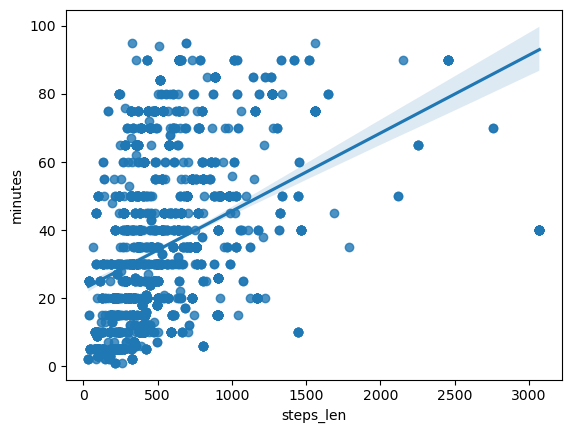

In [7]:
sns.regplot(x = "steps_len", y = "minutes", data = df)

<Axes: xlabel='steps_len', ylabel='n_steps'>

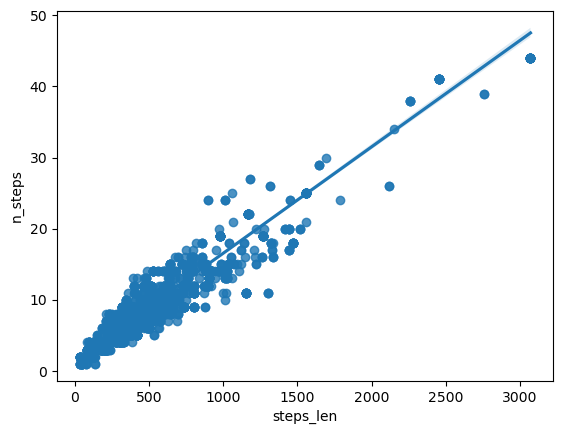

In [8]:
sns.regplot(x = "steps_len", y = "n_steps", data = df)

/tmp/ipykernel_1574618/807340302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_5_10["n_steps"] = train_df_5_10["n_steps"]==10


<Axes: xlabel='steps_len', ylabel='n_steps'>

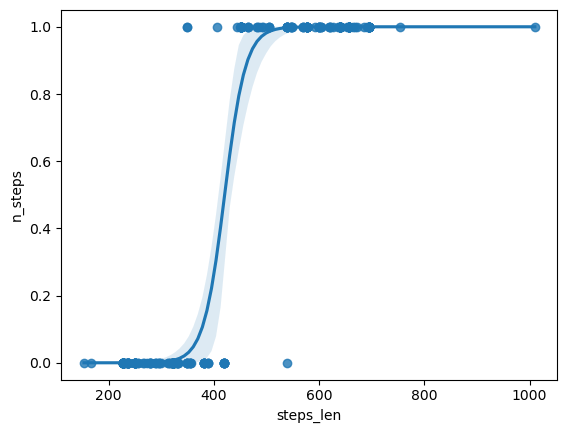

In [9]:
train_df_5_10 = train_df[(train_df["n_steps"]==5) | (train_df["n_steps"]==10)]
train_df_5_10["n_steps"] = train_df_5_10["n_steps"]==10
train_df_5_10["n_steps"].astype(int)
sns.regplot(x = "steps_len", y = "n_steps", data = train_df_5_10, logistic = True)